In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# mpg 데이터셋
* seaborn 패키지의 mpg 예제 데이터셋을 사용한 데이터 시각화

# Data

In [2]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Data Structure 탐색

In [3]:
mpg.iloc[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
mpg.shape # 행, 열 개수 확인

(398, 9)

In [5]:
mpg.describe() #기술통계량 확인

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
mpg['origin'].value_counts() #카테고리형 변수의 카테고리별 빈도수

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [7]:
mpg['name'].value_counts()

ford pinto             6
amc matador            5
toyota corolla         5
ford maverick          5
toyota corona          4
                      ..
dodge charger 2.2      1
chevrolet bel air      1
dodge omni             1
chevrolet vega 2300    1
peugeot 304            1
Name: name, Length: 305, dtype: int64

# scatter plot : 두 변수간 상관관계
* mpg(연비) ~ displacement(배기량)
* 2x2 subplot 생성 : mpg~cylinders(실린더 개수), mpg~horsepower(마력), mpg~weight(자동차무게), mpg~accleration(가속도)

## matplotlib의 plt.scatter() 사용

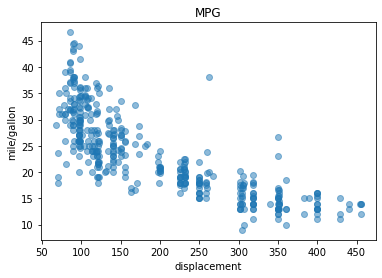

In [8]:
plt.scatter(x = mpg['displacement'], y = mpg['mpg'], alpha = 0.5)
# 또는, plt.scatter(data=mpg, x='displacement', y='mpg', alpha=0.5)
plt.xlabel('displacement')
plt.ylabel('mile/gallon')
plt.title('MPG')
plt.show()

## matplotlib의 plt.plot() 사용

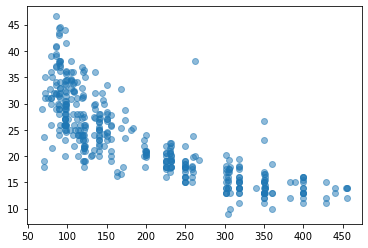

In [11]:
plt.plot(mpg['displacement'], mpg['mpg'],
        marker = 'o', linestyle = '', alpha = 0.5)
plt.show()

## seaborn의 sns.scatterplot() 사용

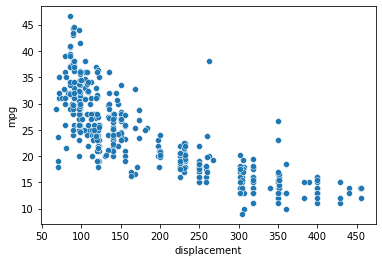

In [12]:
sns.scatterplot(data = mpg, x = 'displacement', y = 'mpg')
plt.show()

## 그룹에 따라 다른 색상으로 나타내기

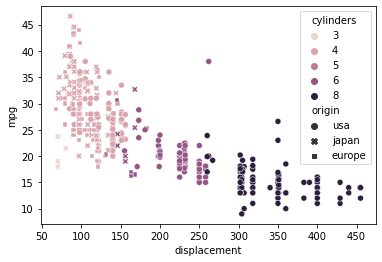

In [15]:
sns.scatterplot(data = mpg, x = 'displacement', y = 'mpg',
               hue = 'cylinders', style = 'origin')
plt.show()

## scatter plot + 추세선

### seaborn의 sns.regplot() 사용

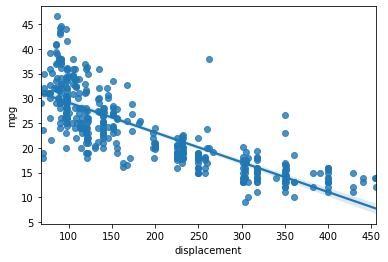

In [13]:
sns.regplot(data = mpg, x = 'displacement', y = 'mpg')
plt.show()

## scatter plot + marginal histogram

### seaborn의 sns.jointplot() 사용

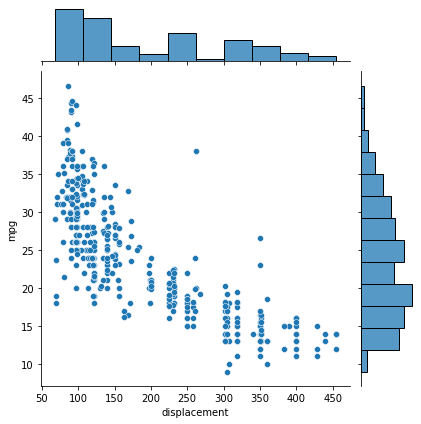

In [14]:
sns.jointplot(data = mpg, x = 'displacement', y = 'mpg')
plt.show()

## 여러개의 scatterplot subplot 그리기

### matplotlib.pyplot 사용 시

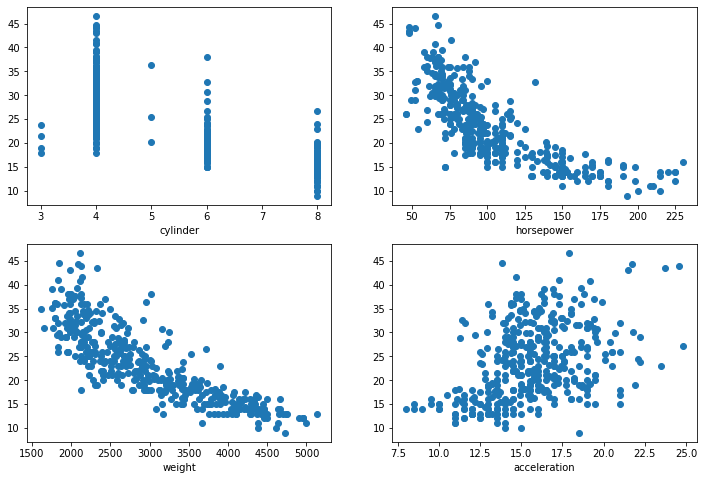

In [18]:
#1. figure 생성
fig = plt.figure(figsize = (12, 8))

#2.subplot 생성
axes = [fig.add_subplot(2, 2, i) for i in range(1, 5)]

#3. subplot마다 그래프 그리기
axes[0].scatter(data = mpg, x = 'cylinders', y = 'mpg')
axes[1].scatter(data = mpg, x = 'horsepower', y = 'mpg')
axes[2].scatter(data = mpg, x = 'weight', y = 'mpg')
axes[3].scatter(data = mpg, x = 'acceleration', y = 'mpg')

#4. 그래프 옵션 설정
axes[0].set_xlabel('cylinder')
axes[1].set_xlabel('horsepower')
axes[2].set_xlabel('weight')
axes[3].set_xlabel('acceleration')

#5. 그래프 보이기
plt.show()

### matplotlib.pyplot에 반복문 사용 시

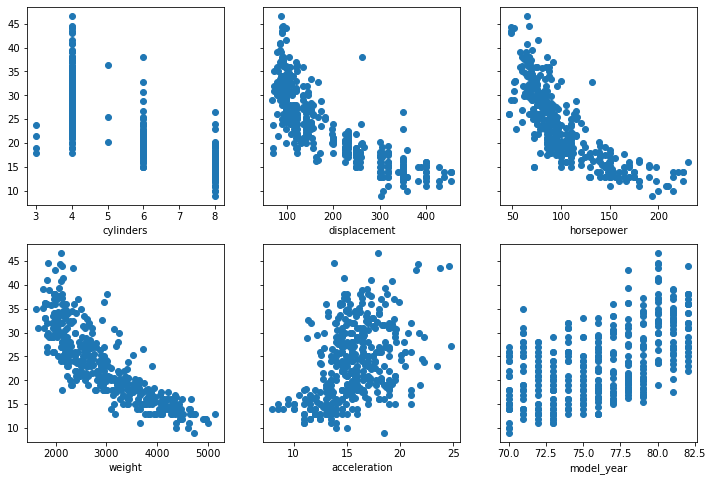

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharey = True, figsize = (12, 8))

for row in range(0, 2):
    for col in range(0, 3):
        x_name = mpg.columns[row * 3 + col + 1]
        axes[row,col].scatter(data = mpg, x = x_name, y = 'mpg')
        axes[row,col].set_xlabel(x_name)
plt.show()

### seaborn패키지의 sns.scatterplot()에 반복문 사용

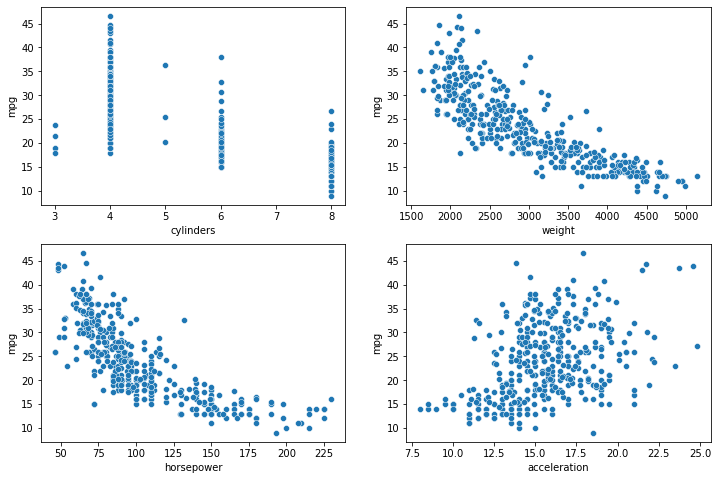

In [25]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))

x_list = ['cylinders', 'horsepower', 'weight', 'acceleration']

for row in range(2):
    for col in range(2):
        sns.scatterplot(data = mpg, x = x_list[row + col * 2], y = 'mpg', ax = axes[row, col])
plt.show()

# barplot : 막대그래프

## matplotlib의 plt.bar() 사용

In [26]:
# cylinder별 mpg 평균 막대그래프 그리기
mpg['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [27]:
mpg_by_cyl = []

for cyl in mpg['cylinders'].unique():
    mpg_mean = mpg[mpg['cylinders'] == cyl]['mpg'].mean()
    mpg_by_cyl.append(mpg_mean)
print(mpg_by_cyl)

[14.963106796116508, 29.28676470588236, 19.985714285714284, 20.55, 27.366666666666664]


In [28]:
s = pd.Series(data = mpg_by_cyl, index = mpg['cylinders'].unique())
s

8    14.963107
4    29.286765
6    19.985714
3    20.550000
5    27.366667
dtype: float64

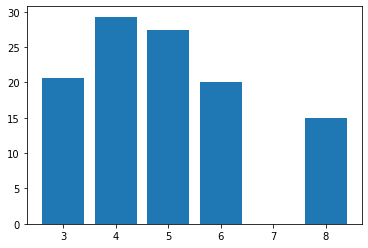

In [29]:
plt.bar(x = s.index, height = s.values)
plt.show()

## seaborn의 sns.barplot() 사용

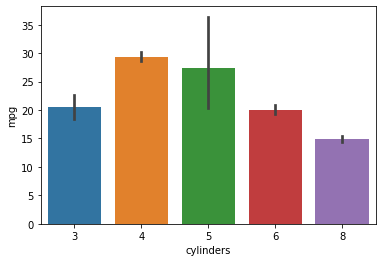

In [30]:
sns.barplot(data = mpg, x = 'cylinders', y = 'mpg')
plt.show()

## 그룹별 평균 막대그래프를 다른 subplot에 표시

### seaborn의 sns.catplot() 사용 시

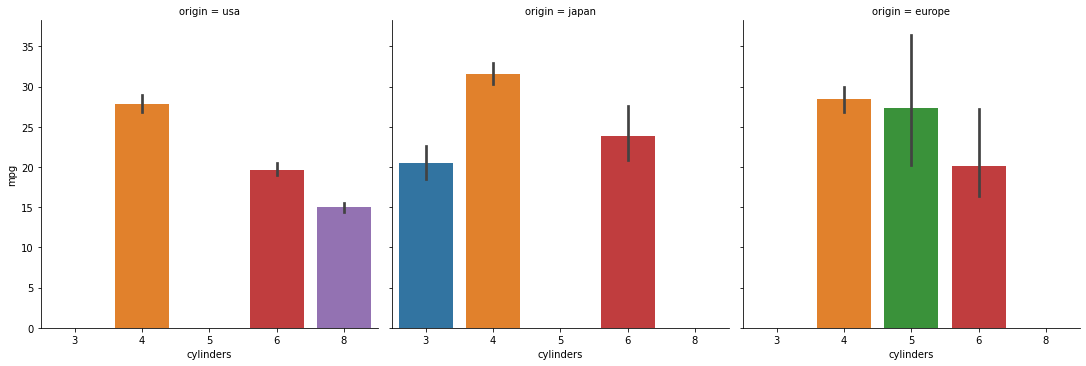

In [34]:
# origin별, cylinder별 mpg 평균 막대그래프를 그리되, origin별 subplot 생성하기
sns.catplot(data = mpg, x = 'cylinders', y = 'mpg', col = 'origin', kind = 'bar')
plt.show()

## seaborn의 sns.boxplot() 사용 시

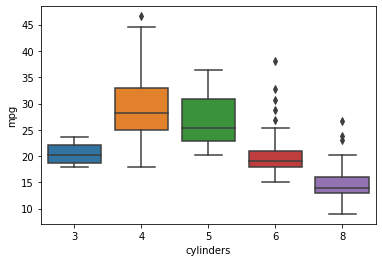

In [31]:
# cylinder별 mpg의 boxplot
sns.boxplot(data = mpg, x = 'cylinders', y = 'mpg')
plt.show()

## 카테고리별로 다른 서브플롯에 나타내기

### seaborn의 sns.catplot() 사용 시

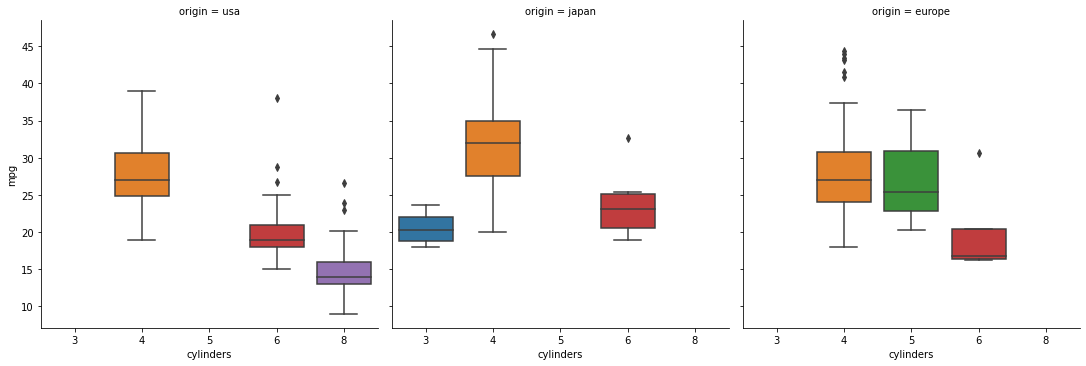

In [32]:
#origin, cylinder별 mpg boxplot을 그리되, origin별 subplot을 생성하는 경우
sns.catplot(data = mpg, x = 'cylinders', y = 'mpg', col = 'origin', kind = 'box')
plt.show()

### matplotlib과 seaborn을 혼용하는 경우

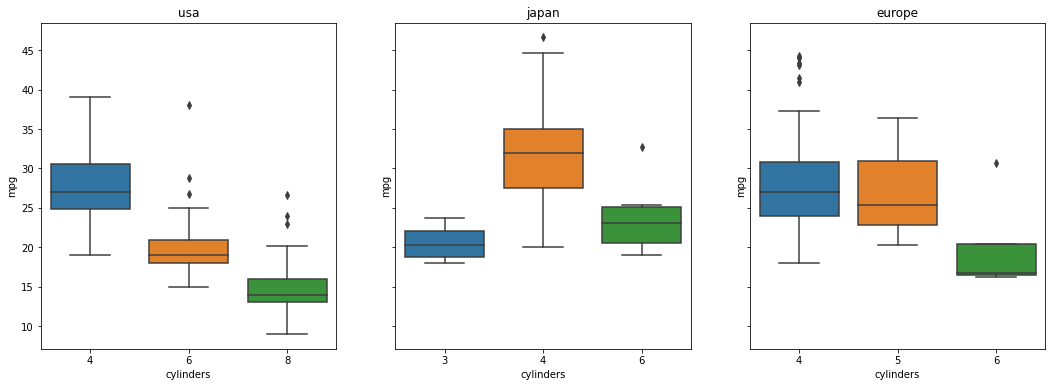

In [33]:
origins = mpg['origin'].unique()

fig, axes = plt.subplots(ncols = len(origins), figsize = (18, 6), sharey = True)

for i, orig in enumerate(origins):
    sub_df = mpg[mpg['origin'] == orig]
    sns.boxplot(data = sub_df, x = 'cylinders', y = 'mpg', ax = axes[i])
    axes[i].set_title(orig)

plt.show()